Phase 2: The Distribution Deep Dive (Univariate)
Understanding the shape of individual signals.

The "Synthetic Spike" Hunt:

Question: Plot kdeplot (distribution) for continuous variables like Age, Cholesterol, and Max HR. Do you see smooth hills, or jagged, weird spikes?

Why: Synthetic data often has "modal collapse" where it repeats specific numbers too often.

The Normality Test:

Question: Are the numerical features skewed? (e.g., Does Cholesterol have a long tail to the right?)

Why: Neural Networks hate skewed data. You might need np.log1p later.

Tool: df.skew() and seaborn.histplot

Phase 3: The Signal Hunt (Bivariate vs. Target)
This is where you find the 0.95 AUC.

The Separation Test (The Most Important One):

Question: Plot a boxplot or violinplot for every numerical feature against the Target (0/1). Which feature shows the biggest vertical gap between the "0" box and the "1" box?

Why: The bigger the gap, the more important the feature.

The Correlation Matrix (Linear & Non-Linear):

Question: Compute the correlation matrix.

First, use method='pearson' (Linear relationships).

Second, use method='spearman' (Rank/Monotonic relationships).

Does any feature pair have a correlation > 0.9?

Why: Highly correlated features (Multicollinearity) are redundant. If Feature A and Feature B are 0.99 correlated, drop one.

The "Rate by Category" Plot:

Question: For categorical features (like Chest Pain Type), calculate the mean of the target for each category. (e.g., "People with Chest Pain Type 4 have an 80% heart disease rate, while Type 1 has 10%").

Why: This tells you if the category order matters. If Type 1 < Type 2 < Type 3 < Type 4 in risk, it's ordinal (keep as number). If the risk jumps randomly, it's nominal (One-Hot Encode).

Tool: sns.barplot(x='feature', y='target')

Phase 4: The Playground Special (Synthetic vs. Test)
This is specific to Kaggle Playground competitions.

The "Adversarial" Check:

Question: Concatenate your Train and Test data (add a column is_train = 1 and is_train = 0). Train a simple model to predict is_train. Is the AUC around 0.5?

Why: If the AUC is 0.5, the Test set looks exactly like the Train set (Good). If the AUC is high (e.g., 0.8), the Test set has a different distribution (Drift), and your leaderboard score will suffer.

The Original Data Check:

Question: Find the original dataset this playground was based on (likely the "UCI Heart Disease" dataset). Does combining the original data with the synthetic data change the distribution?

Why: Sometimes adding the original real-world data improves the model. Sometimes it hurts it because the synthetic distribution is slightly different.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/content/train.csv')
df

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,629995,56,0,1,110,226,0,0,132,0,0.0,1,0,7,Absence
629996,629996,54,1,4,128,249,1,2,150,0,0.0,2,0,3,Absence
629997,629997,67,1,4,130,275,0,0,149,0,0.0,1,2,7,Presence
629998,629998,52,1,4,140,199,0,2,157,0,0.0,1,0,6,Presence


In [5]:
df['Heart Disease'].replace({"Presence":1,"Absence":0},inplace=True)

/tmp/ipython-input-3129545257.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Heart Disease'].replace({"Presence":1,"Absence":0},inplace=True)
/tmp/ipython-input-3129545257.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Heart Disease'].replace({"Presence":1,"Absence":0},inplace=True

In [6]:
df.duplicated().value_counts()

,count
False,630000


In [7]:
for i in df.drop(['id'],axis=1).columns:
  print(pd.crosstab(df[i],df['Heart Disease'],normalize=1))

Heart Disease         0         1
Age                              
29             0.002227  0.000970
34             0.005467  0.002560
35             0.007674  0.004687
37             0.005130  0.002471
38             0.001885  0.000977
39             0.012280  0.004503
40             0.008454  0.005721
41             0.052787  0.022258
42             0.046434  0.020605
43             0.032856  0.017036
44             0.051127  0.027286
45             0.028126  0.017185
46             0.030361  0.020159
47             0.013437  0.007853
48             0.031098  0.019380
49             0.019431  0.013772
50             0.029927  0.022156
51             0.068440  0.048645
52             0.055083  0.040460
53             0.028554  0.020318
54             0.073064  0.075881
55             0.015719  0.021104
56             0.030269  0.037631
57             0.042311  0.062796
58             0.051159  0.084736
59             0.043793  0.058392
60             0.038570  0.056760
61            

things to do:
1. make a scatter plot for age and other numerical columns marked in different color for heart disease yes and no
2. find MI for all


In [8]:
for i in df.drop(['id','Heart Disease'],axis=1).columns:
  print(pd.crosstab(df[i],df['Heart Disease'],normalize=0))
  print(df[i].value_counts(normalize=True))

Heart Disease         0         1
Age                              
29             0.738550  0.261450
34             0.724361  0.275639
35             0.668254  0.331746
37             0.718662  0.281338
38             0.703545  0.296455
39             0.770397  0.229603
40             0.645147  0.354853
41             0.744773  0.255227
42             0.734949  0.265051
43             0.703530  0.296470
44             0.697480  0.302520
45             0.668193  0.331807
46             0.649514  0.350486
47             0.677991  0.322009
48             0.663801  0.336199
49             0.634502  0.365498
50             0.624347  0.375653
51             0.633854  0.366146
52             0.626194  0.373806
53             0.633595  0.366405
54             0.542284  0.457716
55             0.478204  0.521796
56             0.497423  0.502577
57             0.453270  0.546730
58             0.426236  0.573764
59             0.479929  0.520071
60             0.455379  0.544621
61            

high importance features:
1. thalium
2. age
3. no. of vessels fluro
4. slop of st
5. exc


actually all seem important

things I found in kaggle discussions:
how correct are these and explain  how to be sure of such hypothesis.:
Univariate Distributions
Look for:

Truncation or hard cutoffs (synthetic data clues)
Multi-modality
Extreme tails → log transform candidates

Target-Conditioned Distributions
Clean separation → strong standalone predictors
Heavy overlap → interaction effects needed
Weird cliffs → engineered thresholds baked into labels

Categorical Features vs Target
What you’re learning:

Which categories are dominant risk markers
Which features behave almost deterministically (⚠ leakage risk)
Non-monotonic patterns (bad for linear models)

Correlation Structure
Redundancy (e.g., Max HR vs ST depression)
Whether regularization will matter
If PCA would be meaningful

Train vs Test Distribution¶
Red flags:

Shifted means
Truncated ranges in test
Synthetic noise added to one split

Leakage Sniff Test
AUC > 0.90 for a single feature → 🚨
Near-perfect monotonicity → target leakage


things to try from previous eperience:
1. split numerical columns into digits for seach for artefacts
2. check 'id' column for artefacts (itself and after spliting all digits)


In [9]:
df.columns

Index(['id', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease'],
      dtype='object')

In [10]:
num_cols=['Age','BP', 'Cholesterol','Max HR','ST depression']
y=['Heart Disease']
cat_cols=['Sex', 'Chest pain type','FBS over 120', 'EKG results','Exercise angina','Slope of ST', 'Number of vessels fluro', 'Thallium']

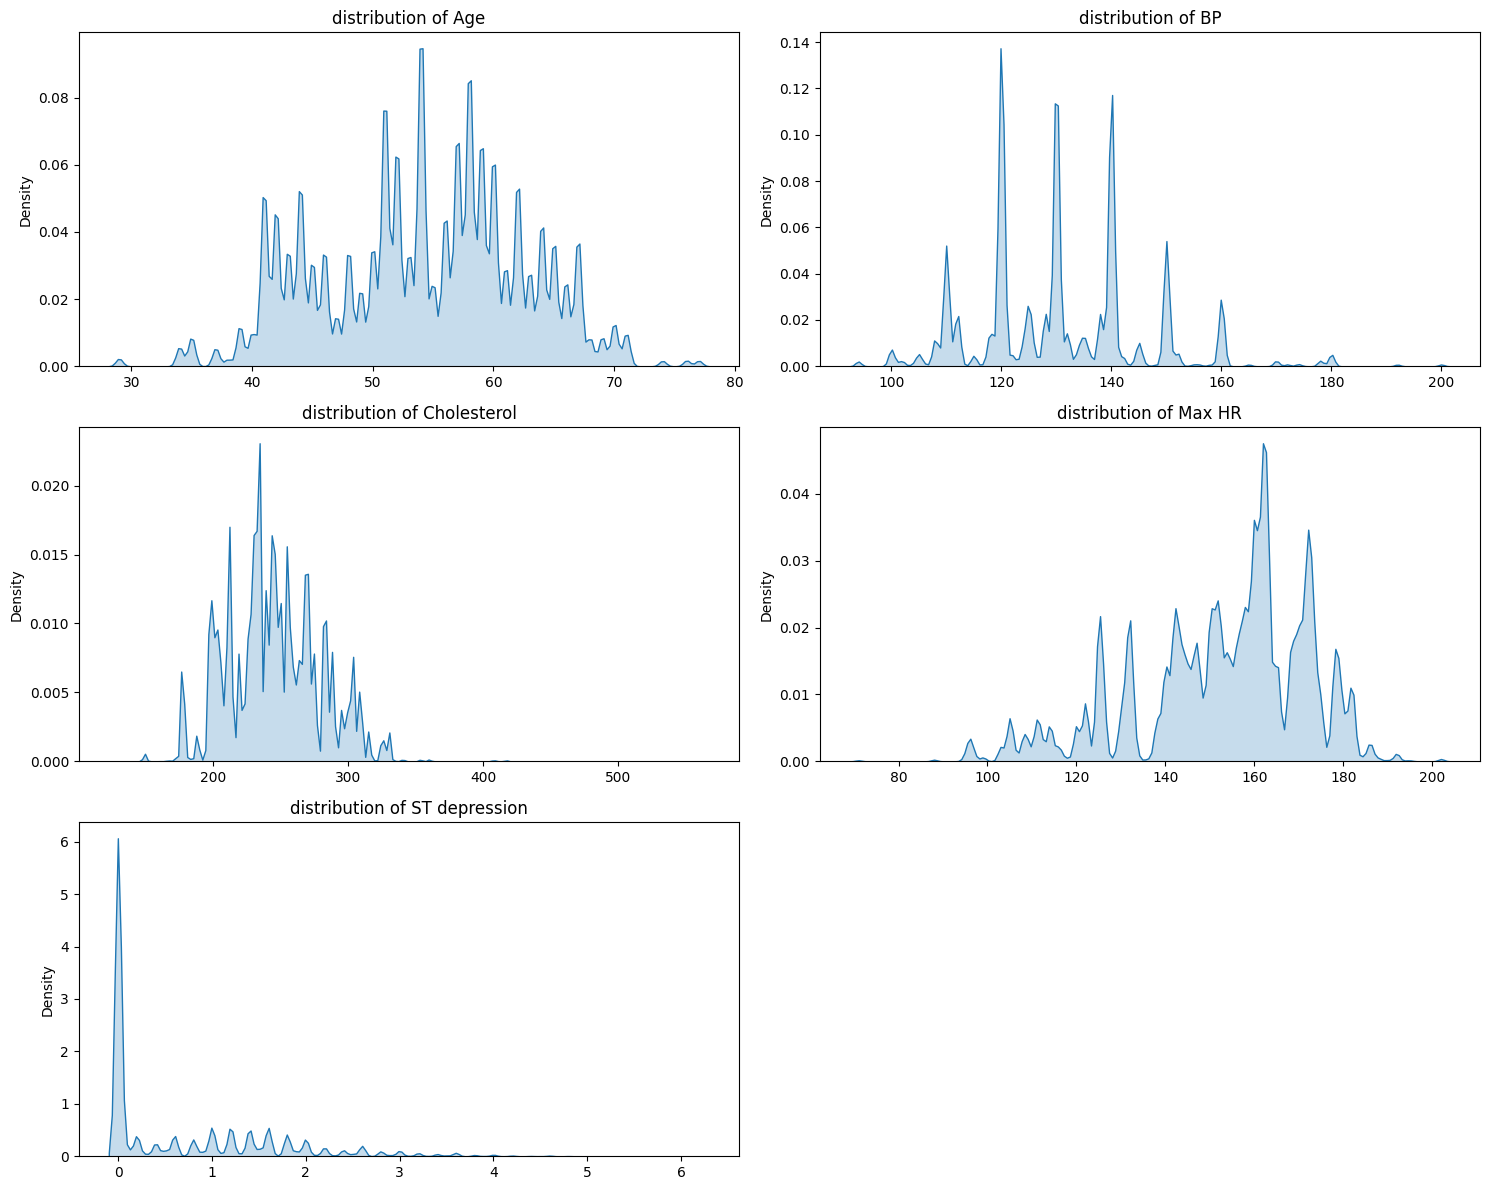

In [11]:
n_cols=2
n_rows=(len(num_cols)//n_cols)+1

fig,axes=plt.subplots(n_rows,n_cols,figsize=(15,4*n_rows))
axes=axes.flatten()

for i,col in enumerate(num_cols):
  sns.kdeplot(df,x=col,fill=True,bw_adjust=0.5,ax=axes[i])
  axes[i].set_title(f'distribution of {col}')
  axes[i].set_xlabel('')

for i in range(len(num_cols),len(axes)):
  fig.delaxes(axes[i])


plt.tight_layout()
plt.show()

observations:
1. pretty jagged


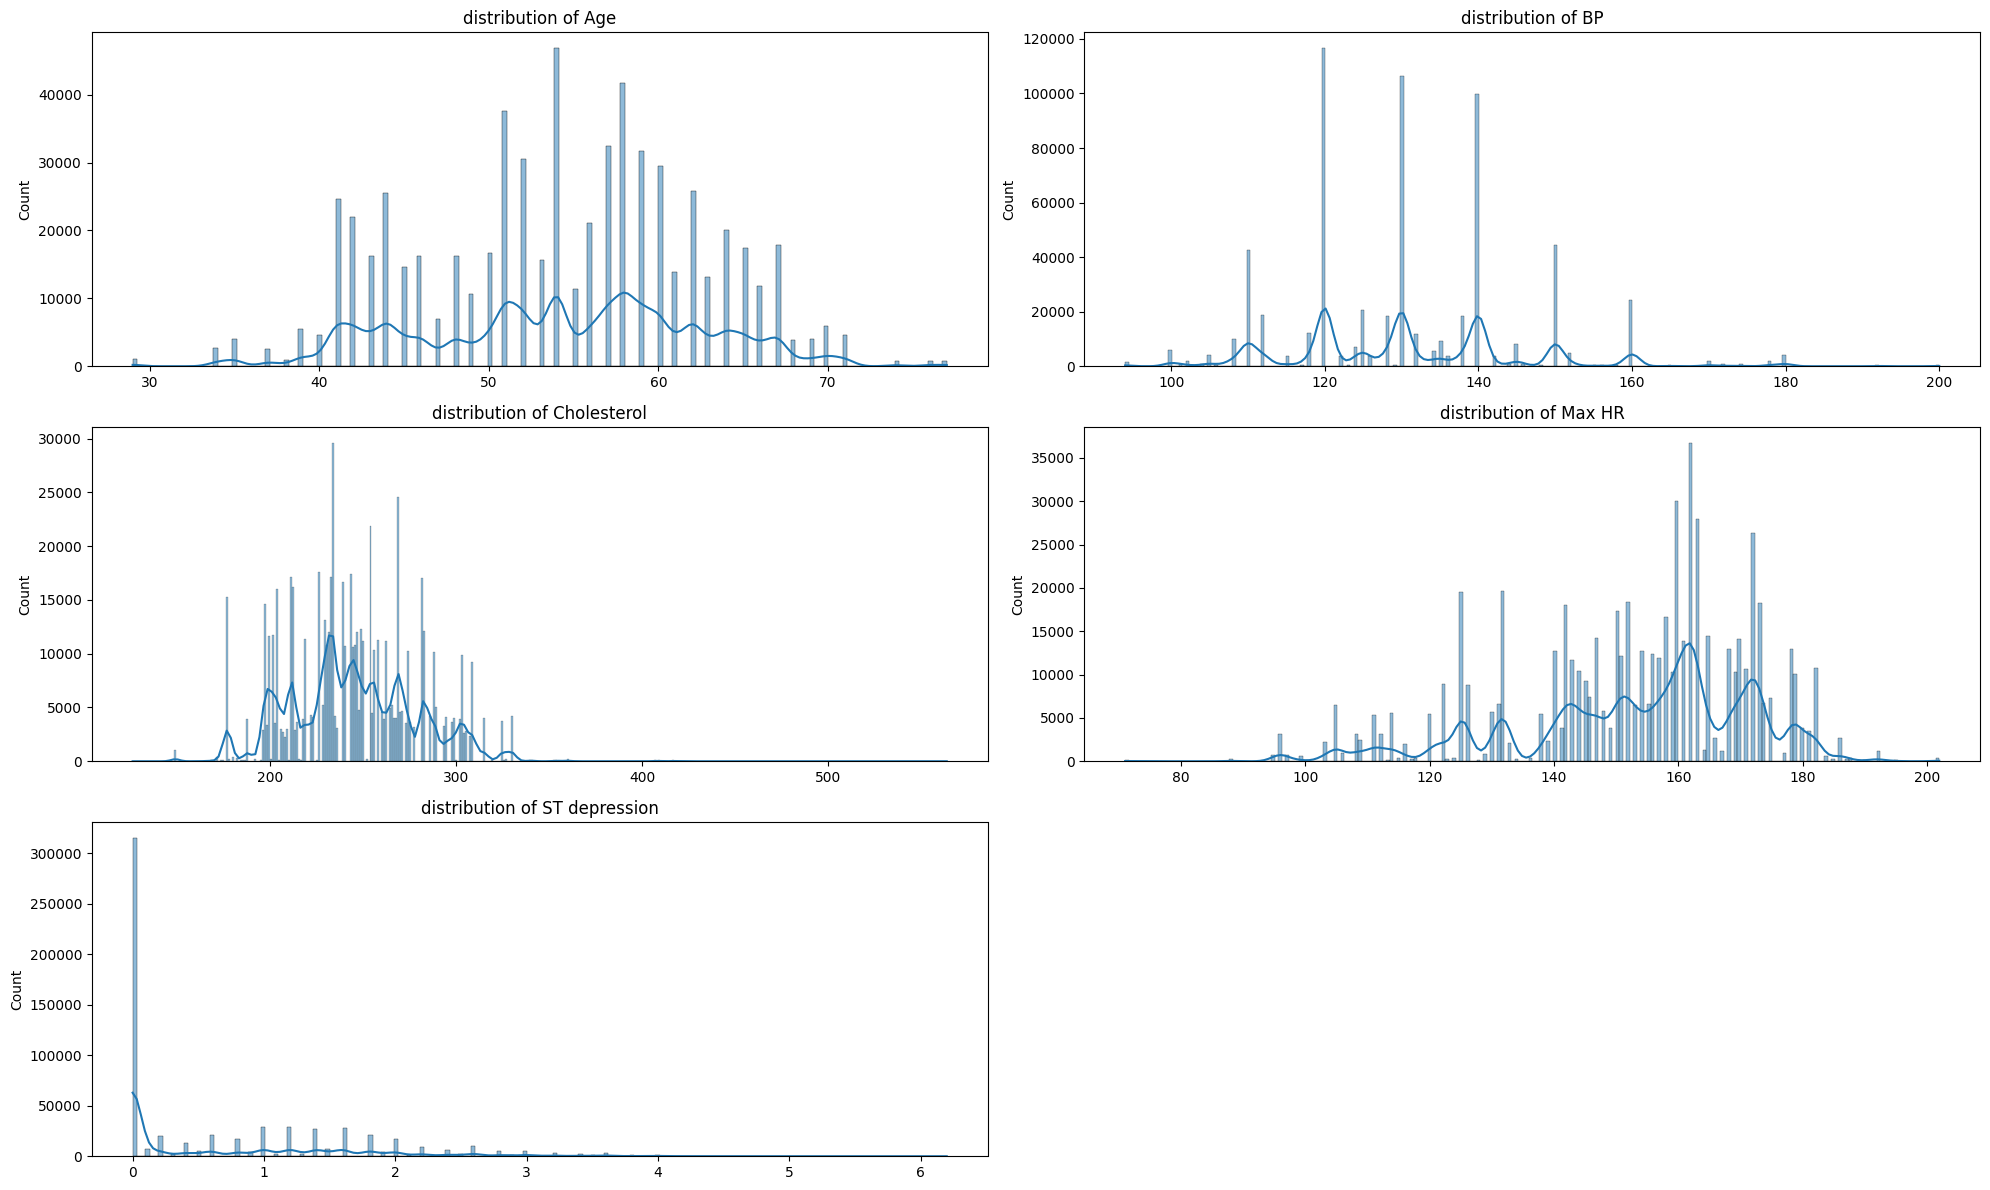

In [12]:
n_cols=2
n_rows=(len(num_cols)//n_cols)+1

fig,axes=plt.subplots(n_rows,n_cols,figsize=(20,4*n_rows))
axes=axes.flatten()

for i,col in enumerate(num_cols):
  sns.histplot(df,x=col,kde=True,ax=axes[i])
  axes[i].set_title(f'distribution of {col}')
  axes[i].set_xlabel('')

for i in range(len(num_cols),len(axes)):
  fig.delaxes(axes[i])


plt.tight_layout()
plt.show()

st depression: heavily right skewed

max hr: left skewed

multi modal : bp and hr


In [17]:
cat_cols

['Sex',
 'Chest pain type',
 'FBS over 120',
 'EKG results',
 'Exercise angina',
 'Slope of ST',
 'Number of vessels fluro',
 'Thallium']

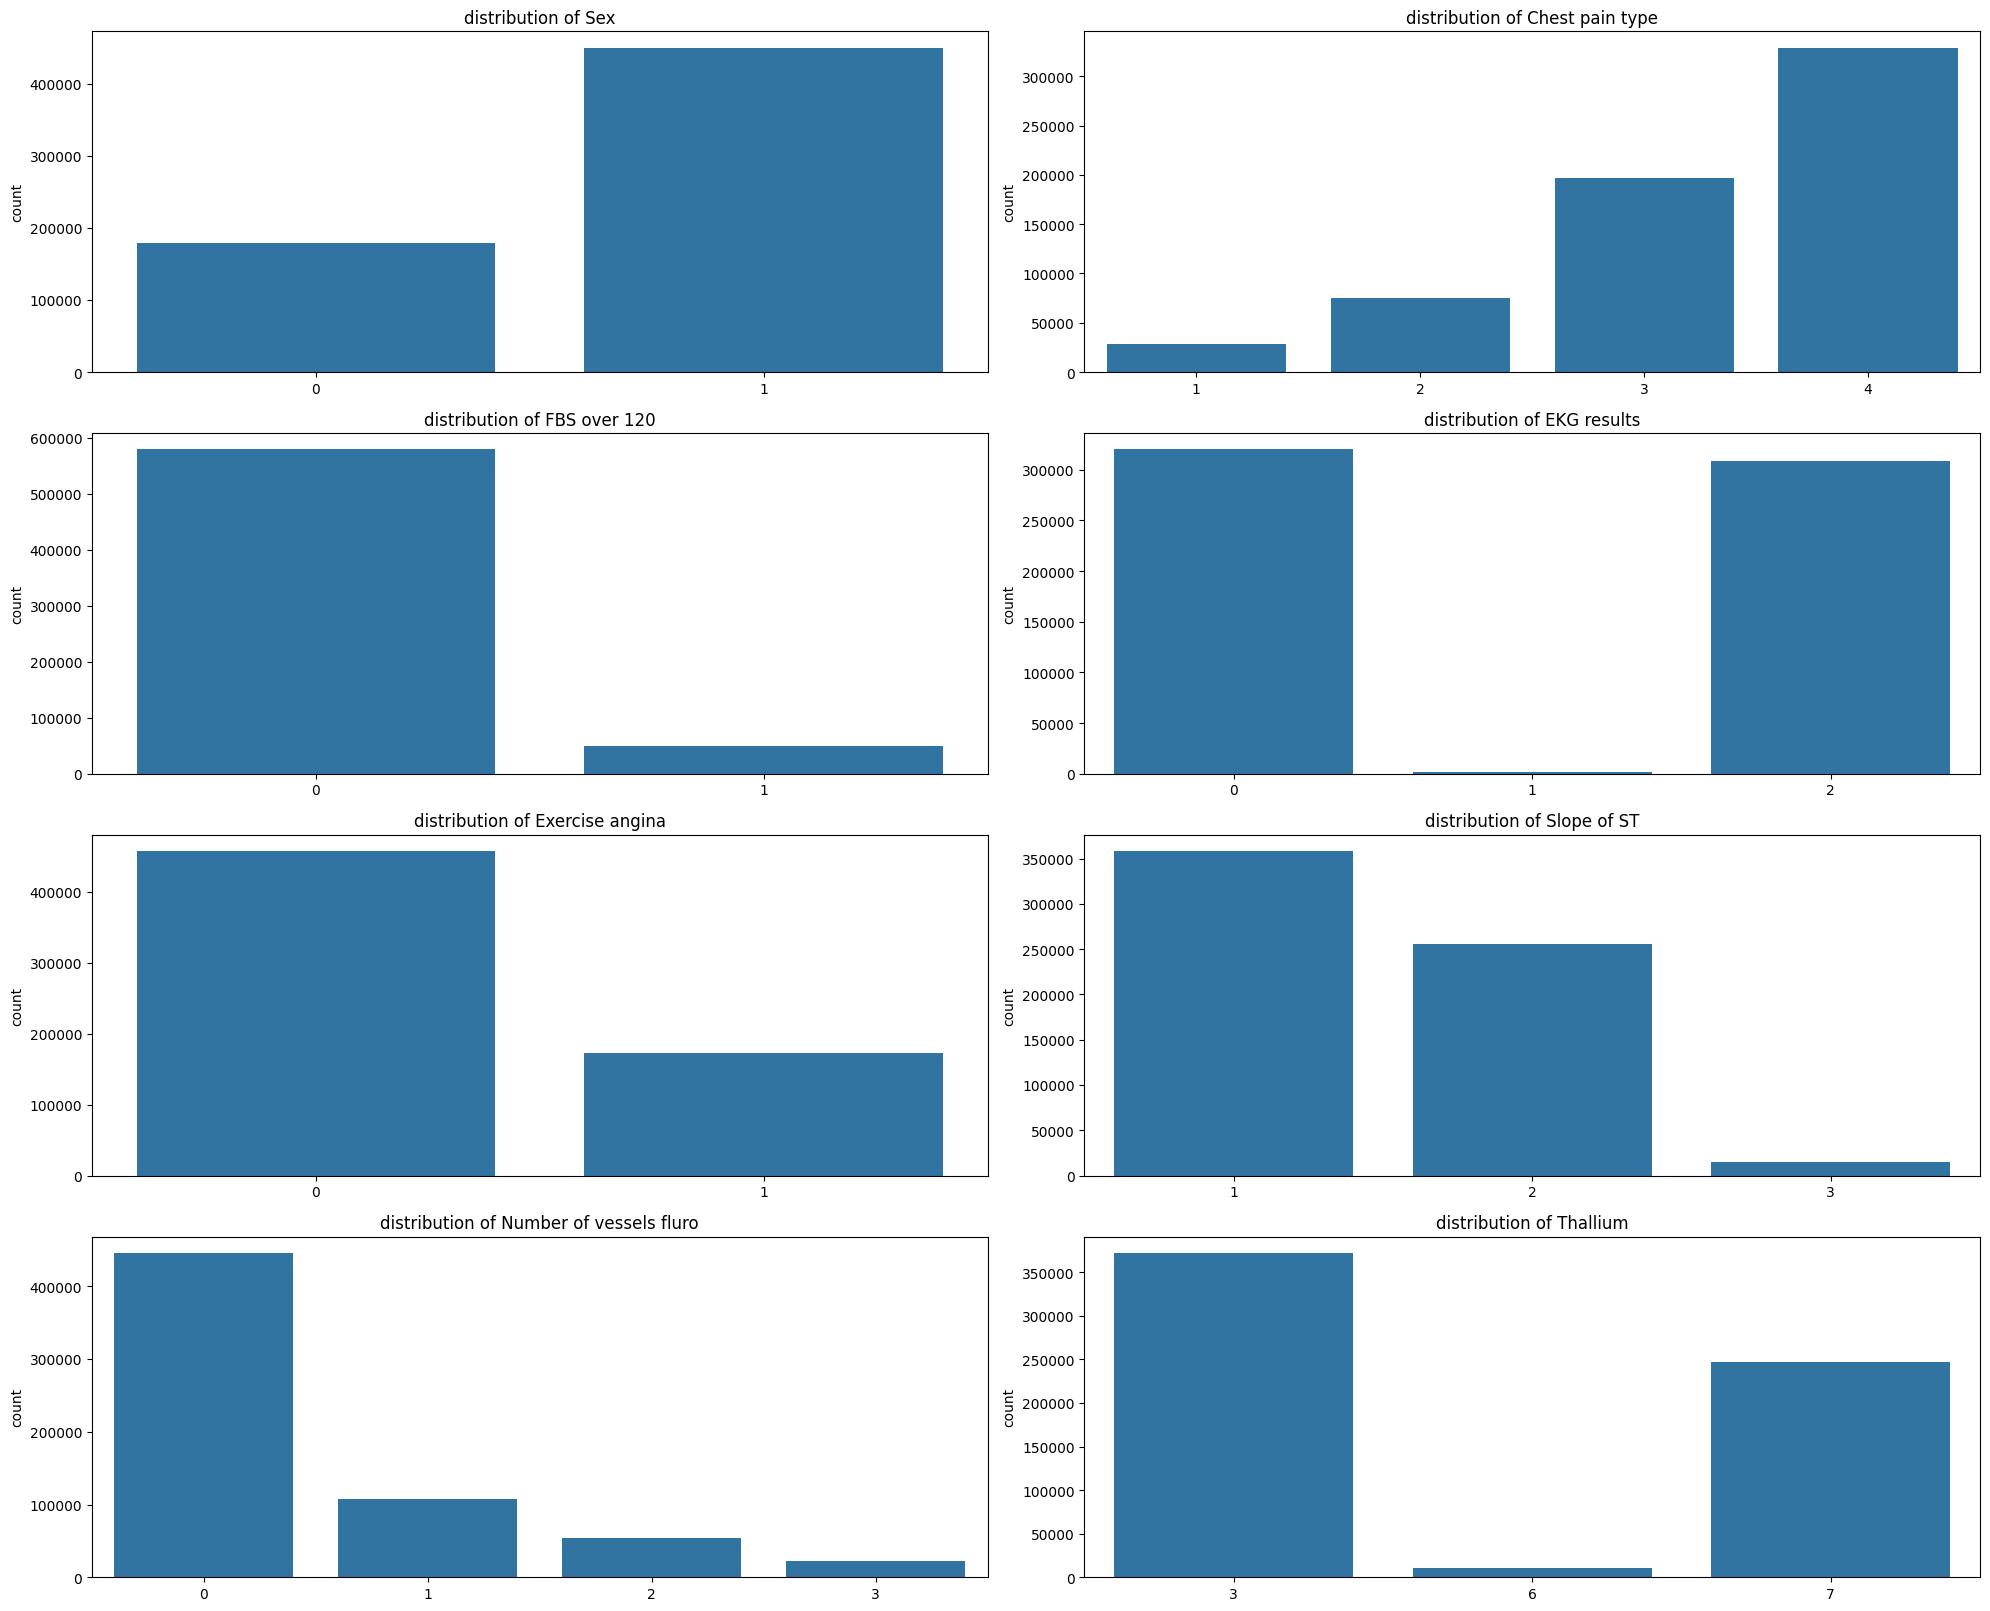

In [18]:
n_cols=2
n_rows=(len(cat_cols)//n_cols)+1

fig,axes=plt.subplots(n_rows,n_cols,figsize=(20,4*n_rows))
axes=axes.flatten()

for i,col in enumerate(cat_cols):
  sns.countplot(df,x=col,ax=axes[i])
  axes[i].set_title(f'distribution of {col}')
  axes[i].set_xlabel('')

for i in range(len(cat_cols),len(axes)):
  fig.delaxes(axes[i])


plt.tight_layout()
plt.show()

sex: 0<<1

chest pain type : 1<2<3<4

fbs over 120: 1<<0

slope over st: 3<<2<1

ekg results : 1 very less

excersice angina : 1<0

vessels: 3<2<1<0

thallium : 6 very less. 7<3


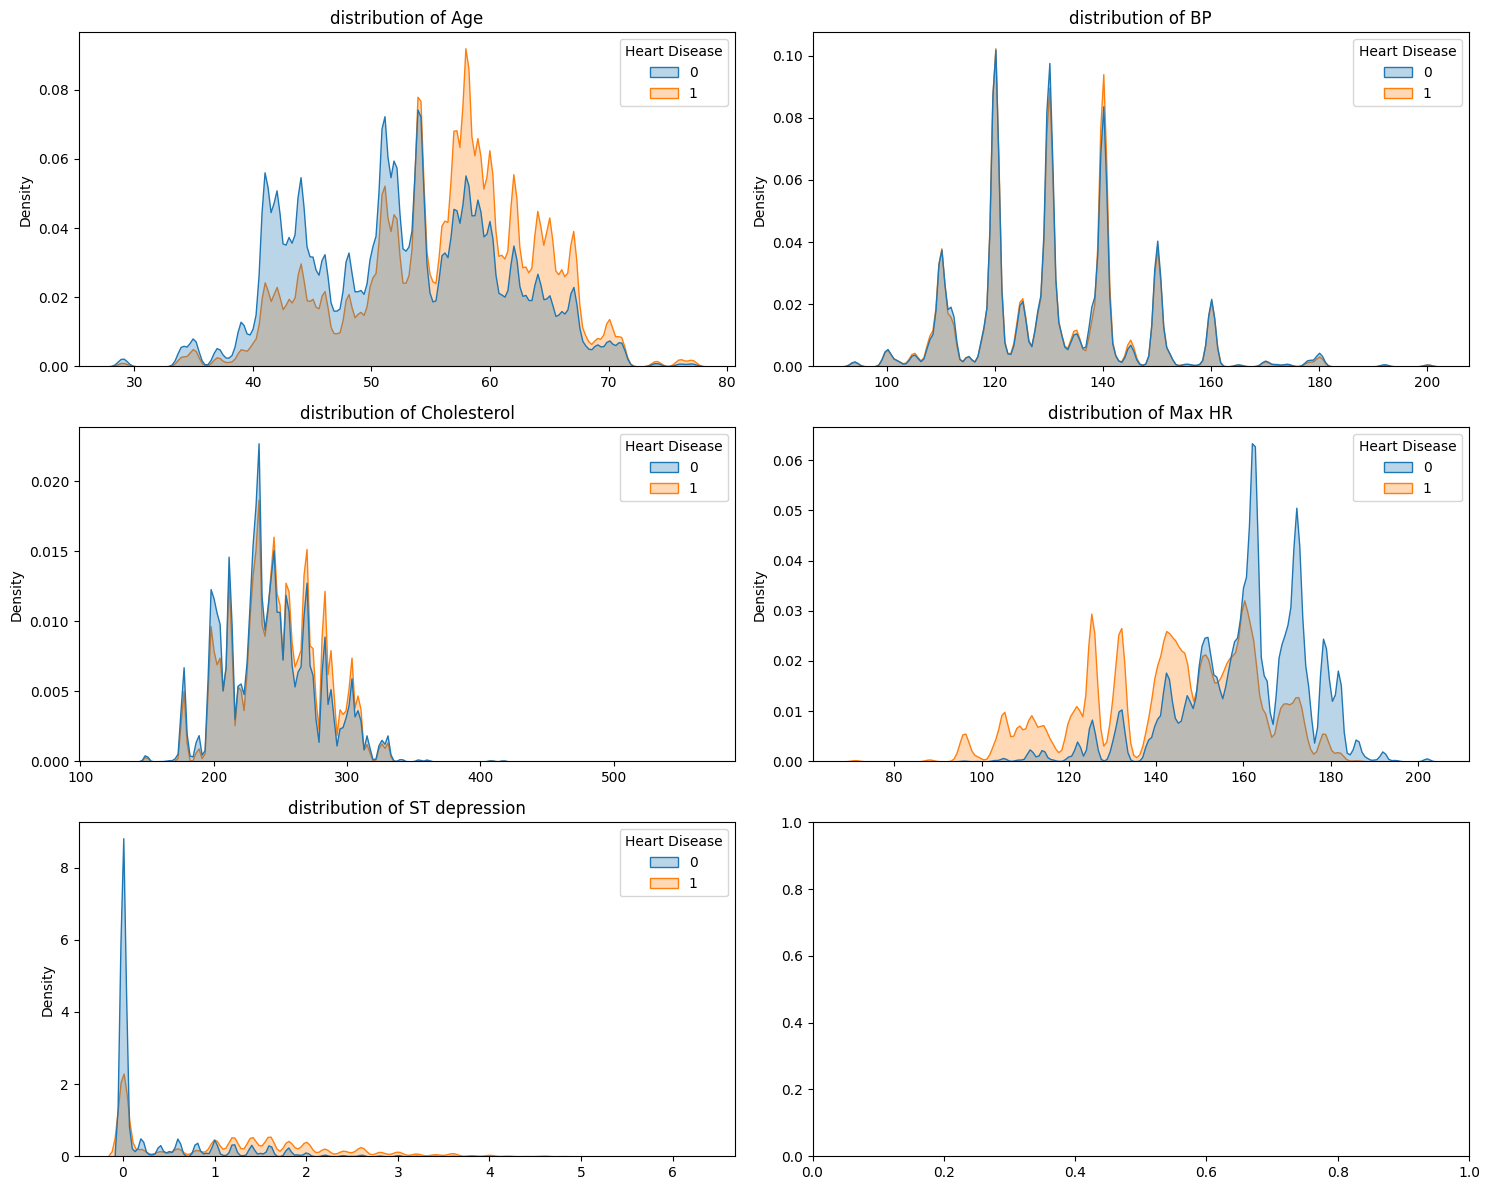

In [19]:
n_cols=2
n_rows=(len(num_cols)//n_cols)+1

fig,axes=plt.subplots(n_rows,n_cols,figsize=(15,4*n_rows))
axes=axes.flatten()

for i,col in enumerate(num_cols):
  sns.kdeplot(df,x=col,fill=True,hue='Heart Disease',common_norm=False,alpha=0.3,bw_adjust=0.6,ax=axes[i])
  axes[i].set_title(f'distribution of {col}')
  axes[i].set_xlabel('')

for i in range(len(cat_cols),len(axes)):
  fig.delaxes(axes[i])


plt.tight_layout()
plt.show()

big gaps in:
1. age
2. max HR
3. ST depression.

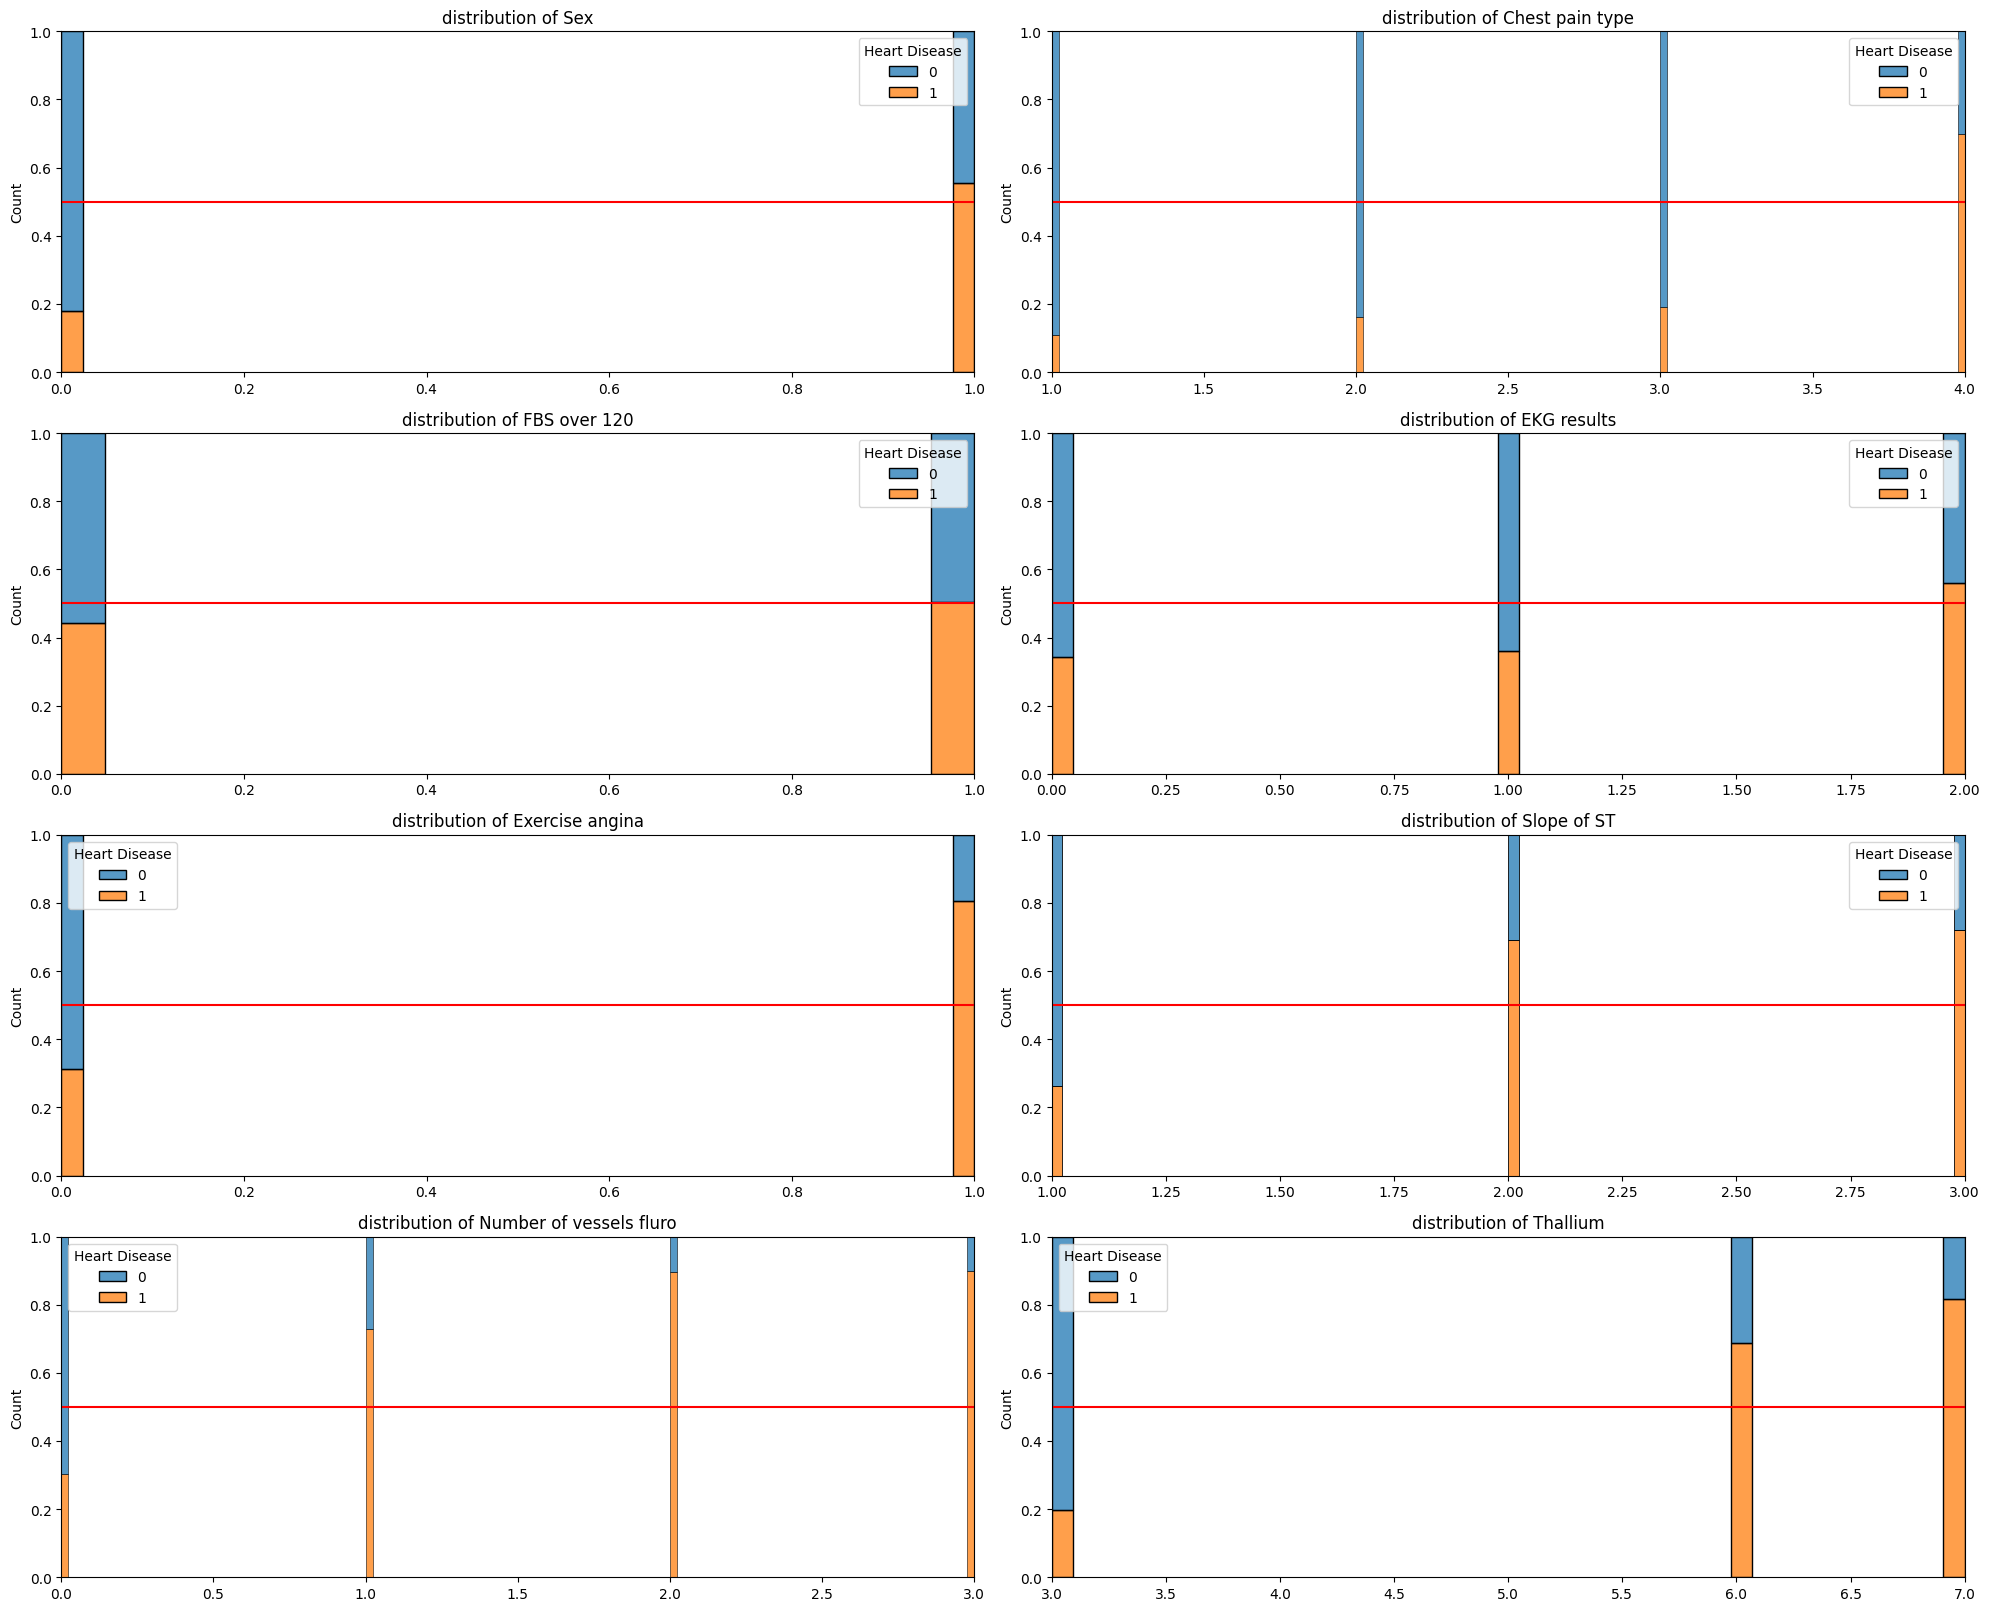

In [21]:
n_cols=2
n_rows=(len(cat_cols)//n_cols)+1

fig,axes=plt.subplots(n_rows,n_cols,figsize=(20,4*n_rows))
axes=axes.flatten()

for i,col in enumerate(cat_cols):
  sns.histplot(df,x=col,hue='Heart Disease',multiple='fill',ax=axes[i])
  axes[i].set_title(f'distribution of {col}')
  axes[i].set_xlabel('')
  axes[i].axhline(0.5,color='red')

for i in range(len(cat_cols),len(axes)):
  fig.delaxes(axes[i])


plt.tight_layout()
plt.show()

sex:
1: slightly higher than 0.5
0: risk very low (0.2)

chest pain:
risk low for 1,2,3
high for 4

FBS OVER 120 :
0: slightly less that 0.5
1: 0.5

ekg:
0 and 1 slightly less that 0.4
2: slightly more that 0.5

exercise angina:
0: around 0.3
1: aroumd 0.8

slope of st:
1: around 0.2
2 and 3 around .7

vessels:
0: 0.3
1,2,3 all high

thalium:
3: 0.2
6 and 7 ; high


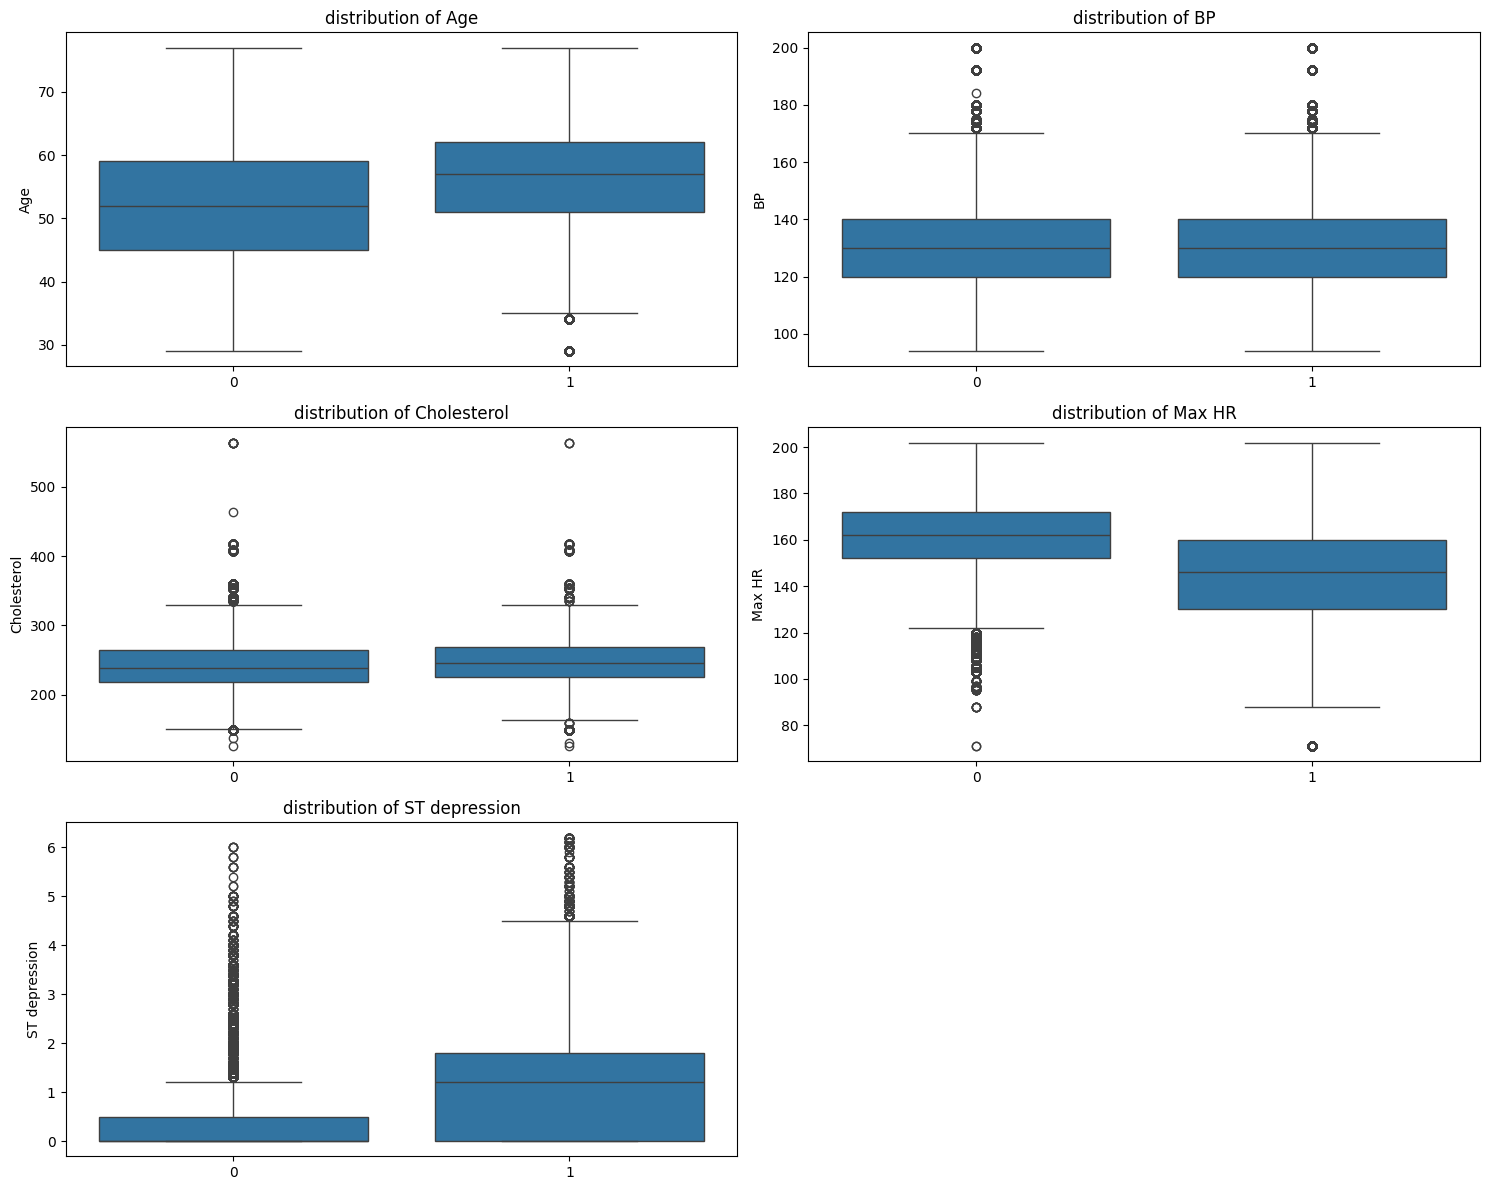

In [27]:
n_cols=2
n_rows=(len(num_cols)//n_cols)+1

fig,axes=plt.subplots(n_rows,n_cols,figsize=(15,4*n_rows))
axes=axes.flatten()

for i,col in enumerate(num_cols):
  sns.boxplot(df,y=col,x='Heart Disease', ax=axes[i])
  axes[i].set_title(f'distribution of {col}')
  axes[i].set_xlabel('')

for i in range(len(num_cols),len(axes)):
  fig.delaxes(axes[i])


plt.tight_layout()
plt.show()

bp looks identical

cholestrol too, only outliers look litle different.

st depression much taller for sick people.

quite alot of outliers in st depression, hr and cholesterol

varience could be a predictor

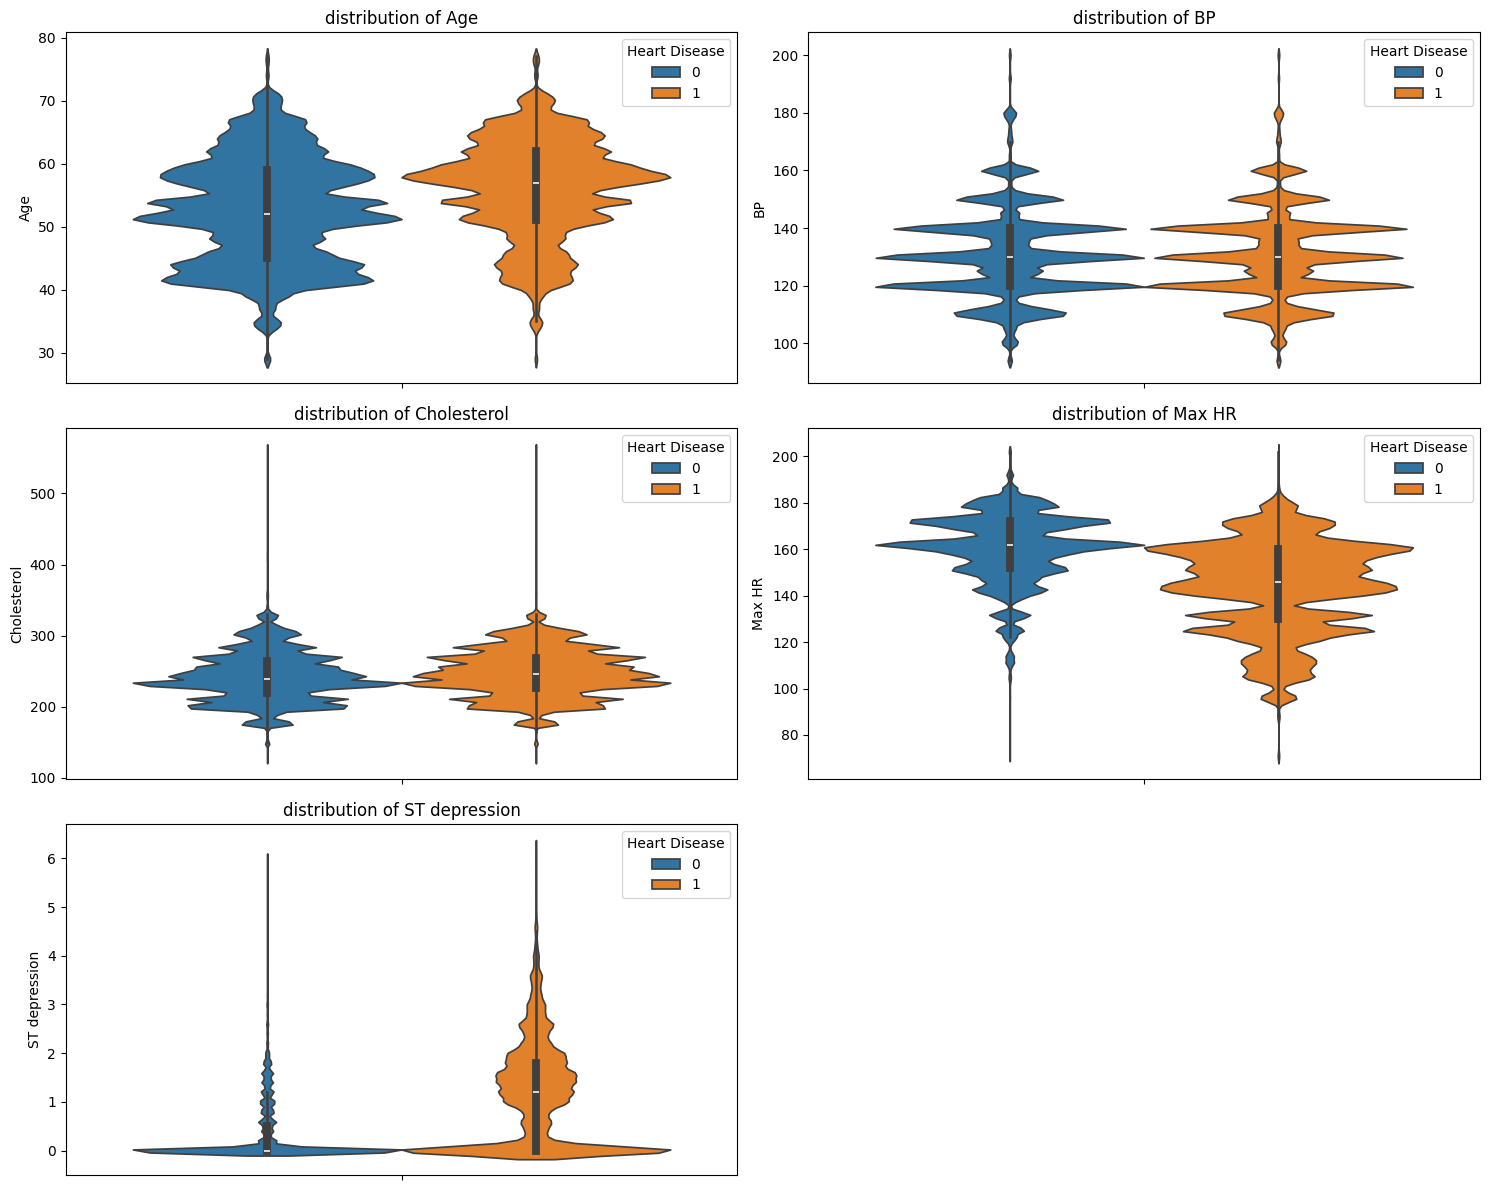

In [25]:
n_cols=2
n_rows=(len(num_cols)//n_cols)+1

fig,axes=plt.subplots(n_rows,n_cols,figsize=(15,4*n_rows))
axes=axes.flatten()

for i,col in enumerate(num_cols):
  sns.violinplot(df,y=col,hue='Heart Disease', ax=axes[i],)
  axes[i].set_title(f'distribution of {col}')
  axes[i].set_xlabel('')

for i in range(len(num_cols),len(axes)):
  fig.delaxes(axes[i])


plt.tight_layout()
plt.show()

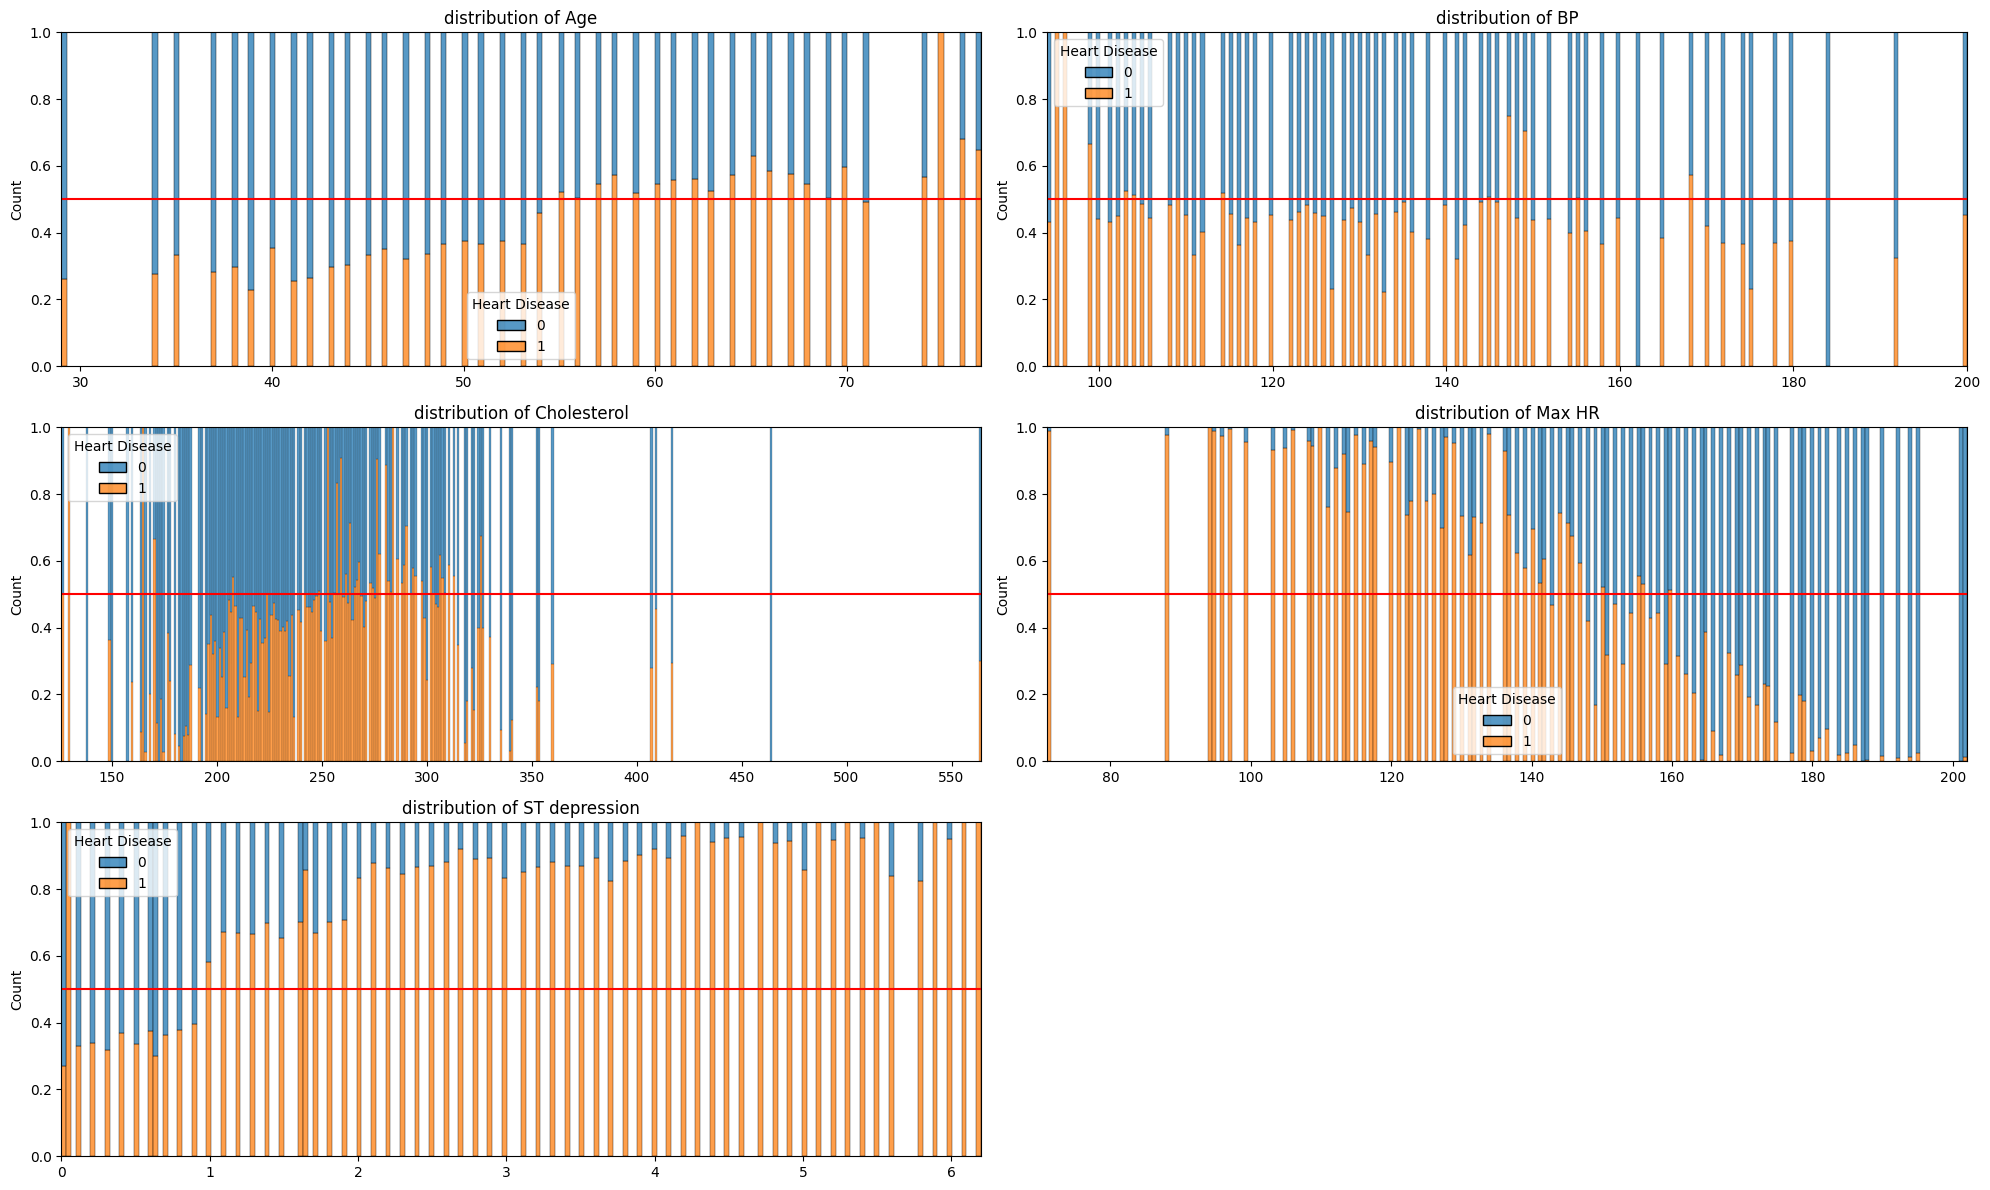

In [22]:
n_cols=2
n_rows=(len(num_cols)//n_cols)+1

fig,axes=plt.subplots(n_rows,n_cols,figsize=(20,4*n_rows))
axes=axes.flatten()

for i,col in enumerate(num_cols):
  sns.histplot(df,x=col,hue='Heart Disease',multiple='fill',ax=axes[i])
  axes[i].set_title(f'distribution of {col}')
  axes[i].set_xlabel('')
  axes[i].axhline(0.5,color='red')

for i in range(len(num_cols),len(axes)):
  fig.delaxes(axes[i])


plt.tight_layout()
plt.show()